In [53]:
# Se importan librerias que se usaran en el proyecto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [54]:
# Cargamos un dataframe con la informacion del archivo provisto
df = pd.read_csv('../data/raw/spotify-2023.csv', encoding='ISO-8859-1') # Se utiliza encoding ISO-8859-1 para evitar errores en la carga

In [55]:
# Mostrar las primeras filas para explorar el contenido
df.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

In [56]:
df.describe()

artist_count  released_year  released_month  released_day  \
count    952.000000     952.000000      952.000000    952.000000   
mean       1.556723    2018.288866        6.038866     13.944328   
std        0.893331      11.011397        3.564571      9.197223   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            952.000000         952.000000  9.520000e+02   
mean            5202.565126          12.022059  5.141374e+08   
std             7901.400683          19.582405  5.668569e+08   
min               31.000000           0.000000  2.762000e+03   
25%              874.500000           0.000000  1.416362e+08   
50%             2216.500000           3.000000  2.905309e+08   
75%             5573.750000          16.000000  6.738690e+08   
max            52898.000000         147.000000  3.703895e+09   

       in_apple_playlists  in_apple_charts  in_deezer_charts         bpm  \
count          952.000000       952.000000        952.000000  952.000000   
mean            67.866597        51.963235          2.669118  122.553571   
std             86.470591        50.628850          6.038152   28.069601   
min              0.000000         0.000000          0.000000   65.000000   
25%             13.000000         7.000000          0.000000   99.750000   
50%             34.000000        38.500000          0.000000  121.000000   
75%             88.000000        87.000000          2.000000  140.250000   
max            672.000000       275.000000         58.000000  206.000000   

       danceability_%   valence_%    energy_%  acousticness_%  \
count      952.000000  952.000000  952.000000      952.000000   
mean        66.984244   51.406513   64.274160       27.078782   
std         14.631282   23.480526   16.558517       26.001599   
min         23.000000    4.000000    9.000000        0.000000   
25%         57.000000   32.000000   53.000000        6.000000   
50%         69.000000   51.000000   66.000000       18.000000   
75%         78.000000   70.000000   77.000000       43.000000   
max         96.000000   97.000000   97.000000       97.000000   

       instrumentalness_%  liveness_%  speechiness_%  
count          952.000000  952.000000     952.000000  
mean             1.582983   18.214286      10.138655  
std              8.414064   13.718374       9.915399  
min              0.000000    3.000000       2.000000  
25%              0.000000   10.000000       4.000000  
50%              0.000000   12.000000       6.000000  
75%              0.000000   24.000000      11.000000  
max             91.000000   97.000000      64.000000

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    ob

In [58]:
df[df['streams'] == df['streams'].max()]

track_name artist(s)_name  artist_count  released_year  \
55  Blinding Lights     The Weeknd             1           2019   

    released_month  released_day  in_spotify_playlists  in_spotify_charts  \
55              11            29                 43899                 69   

       streams  in_apple_playlists  ...  bpm key   mode danceability_%  \
55  3703895074                 672  ...  171  C#  Major             50   

    valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
55         38       80              0                   0           9   

    speechiness_%  
55              7  

[1 rows x 24 columns]

In [59]:
print(df.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [60]:
# Rellenar los valores nulos en 'in_shazam_charts' con 0.  
df['in_shazam_charts'].fillna(0, inplace=True)

In [61]:
print(df.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


              bpm  danceability_%   valence_%    energy_%  acousticness_%  \
count  952.000000      952.000000  952.000000  952.000000      952.000000   
mean   122.553571       66.984244   51.406513   64.274160       27.078782   
std     28.069601       14.631282   23.480526   16.558517       26.001599   
min     65.000000       23.000000    4.000000    9.000000        0.000000   
25%     99.750000       57.000000   32.000000   53.000000        6.000000   
50%    121.000000       69.000000   51.000000   66.000000       18.000000   
75%    140.250000       78.000000   70.000000   77.000000       43.000000   
max    206.000000       96.000000   97.000000   97.000000       97.000000   

       instrumentalness_%  liveness_%  speechiness_%  
count          952.000000  952.000000     952.000000  
mean             1.582983   18.214286      10.138655  
std              8.414064   13.718374       9.915399  
min              0.000000    3.000000       2.000000  
25%              0.000000   10.

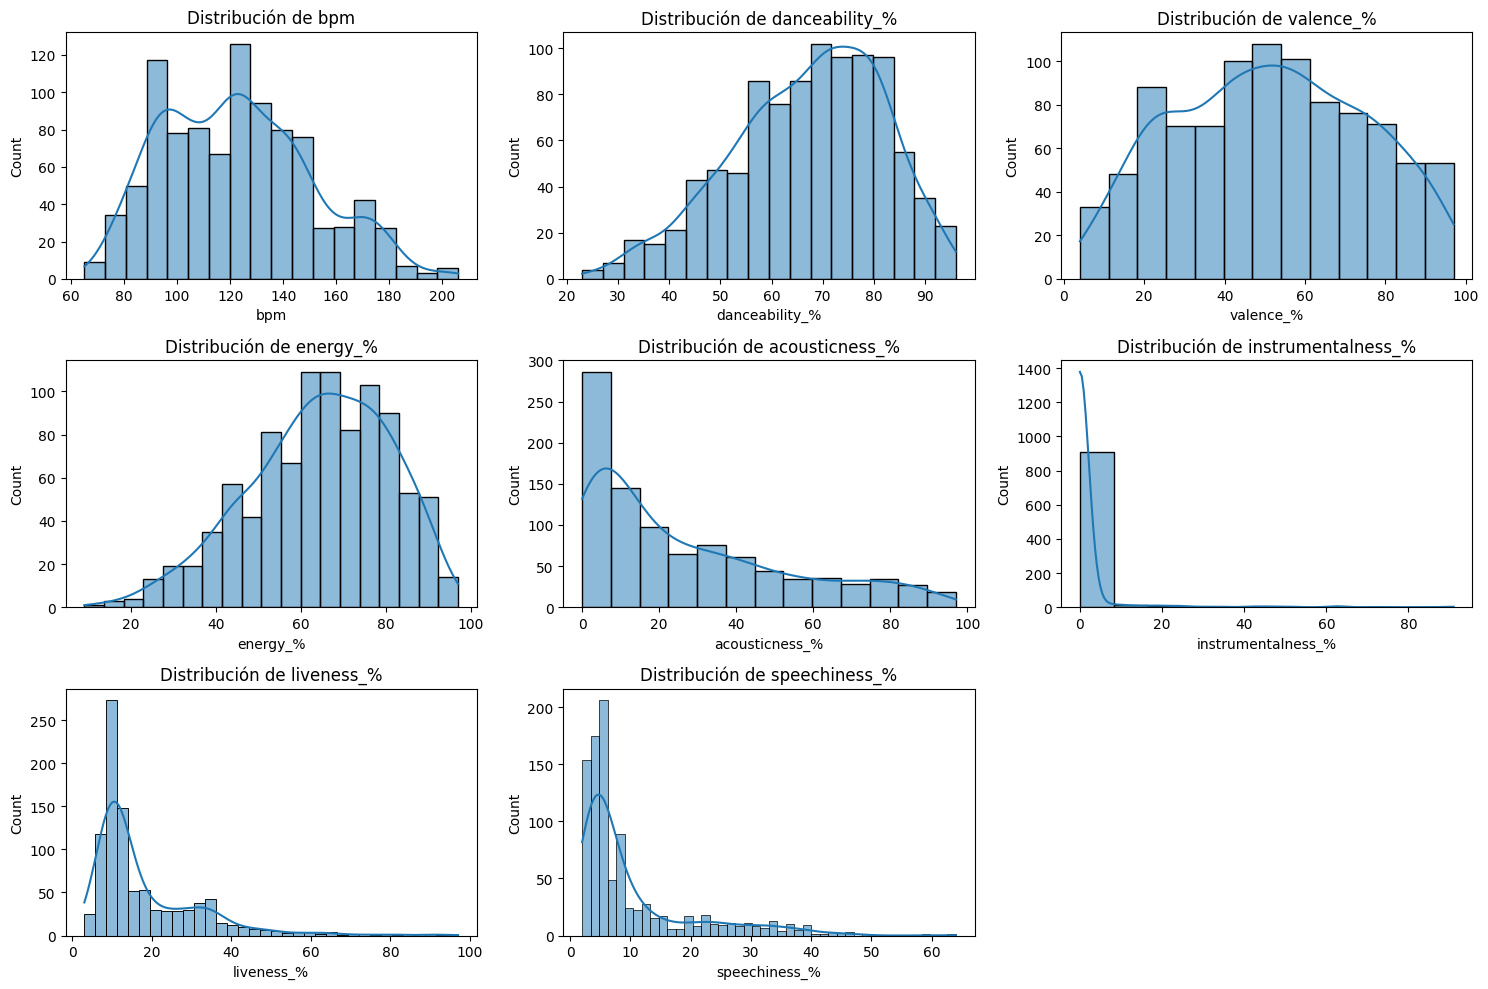

In [62]:
# Estadísticas descriptivas de las características musicales
audio_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
print(df[audio_features].describe())

# Graficar la distribución de cada característica
plt.figure(figsize=(15, 10))
for i, feature in enumerate(audio_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribución de {feature}')
plt.tight_layout()
plt.show()

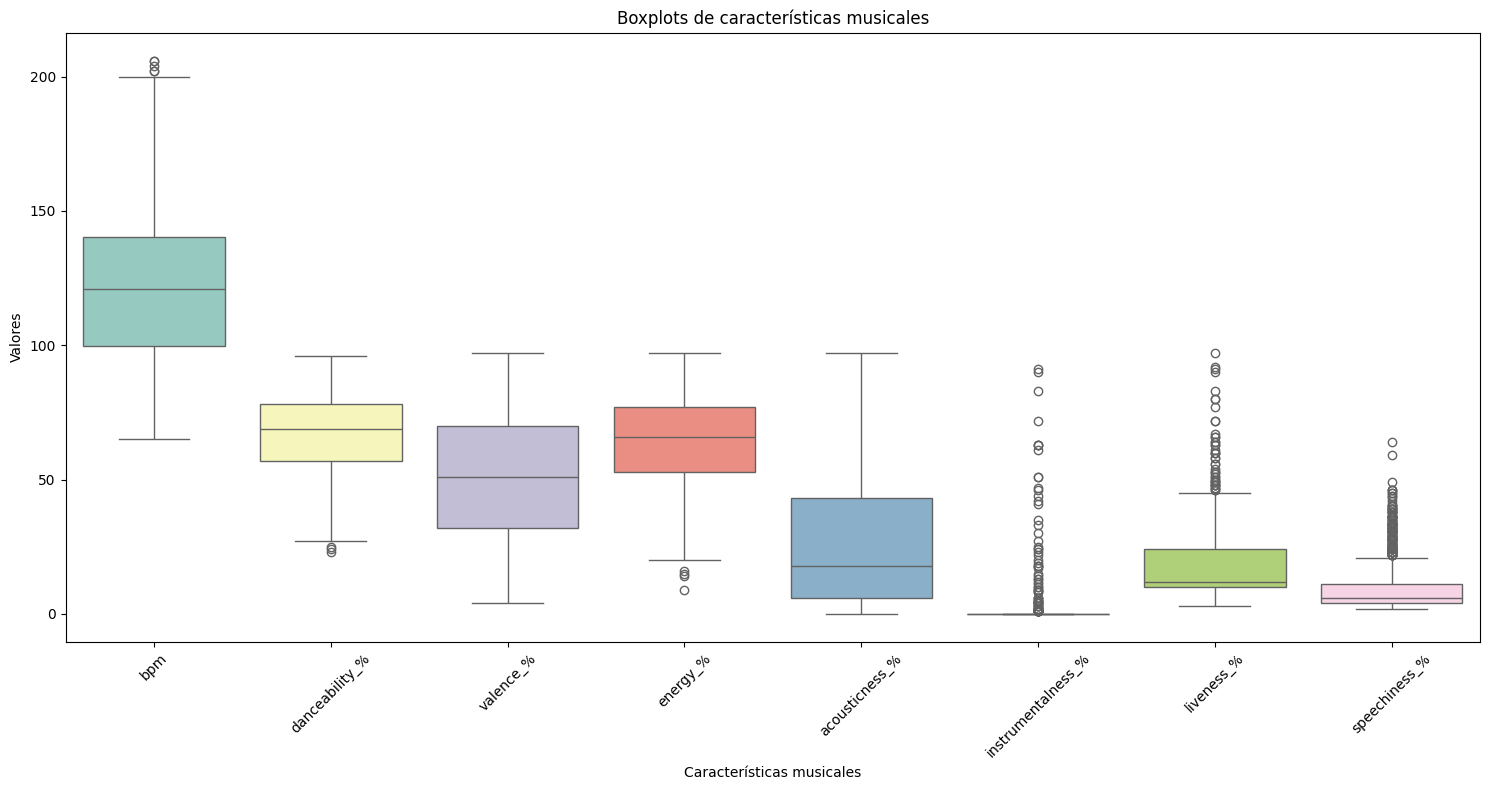

<Figure size 640x480 with 0 Axes>

In [102]:
plt.figure(figsize=(15, 8))

# Crear un boxplot para cada característica musical
sns.boxplot(data=df[audio_features], palette='Set3')

plt.title('Boxplots de características musicales')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.xlabel('Características musicales')
plt.ylabel('Valores')
plt.tight_layout()
plt.show()





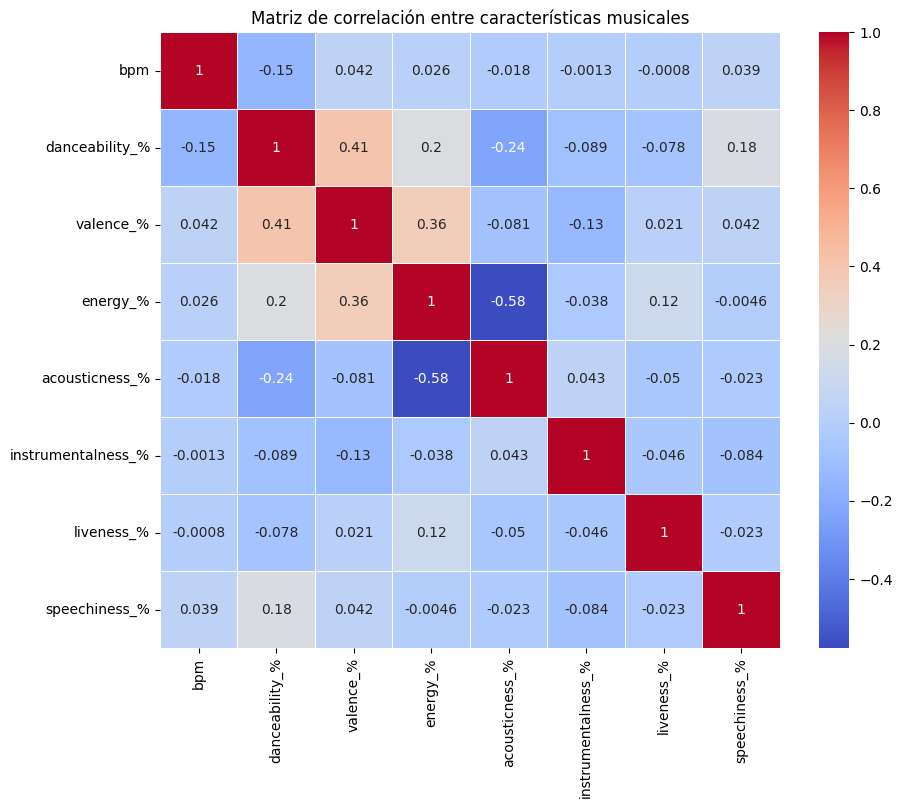

In [64]:
# Matriz de correlación de caracteristicas musicales
correlation_matrix = df[audio_features].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación entre características musicales')
plt.show()

In [65]:
# Agregar una nueva columna 'Streams_MM' al DataFrame y redondear a 2 decimales
df['Streams_MM'] = (df['streams'] / 1000000).round(2)

# Verificar que la nueva columna se haya agregado correctamente
print(df[['streams', 'Streams_MM']].head())  # Mostrar las primeras filas de 'streams' y 'Streams_MM'


     streams  Streams_MM
0  141381703      141.38
1  133716286      133.72
2  140003974      140.00
3  800840817      800.84
4  303236322      303.24


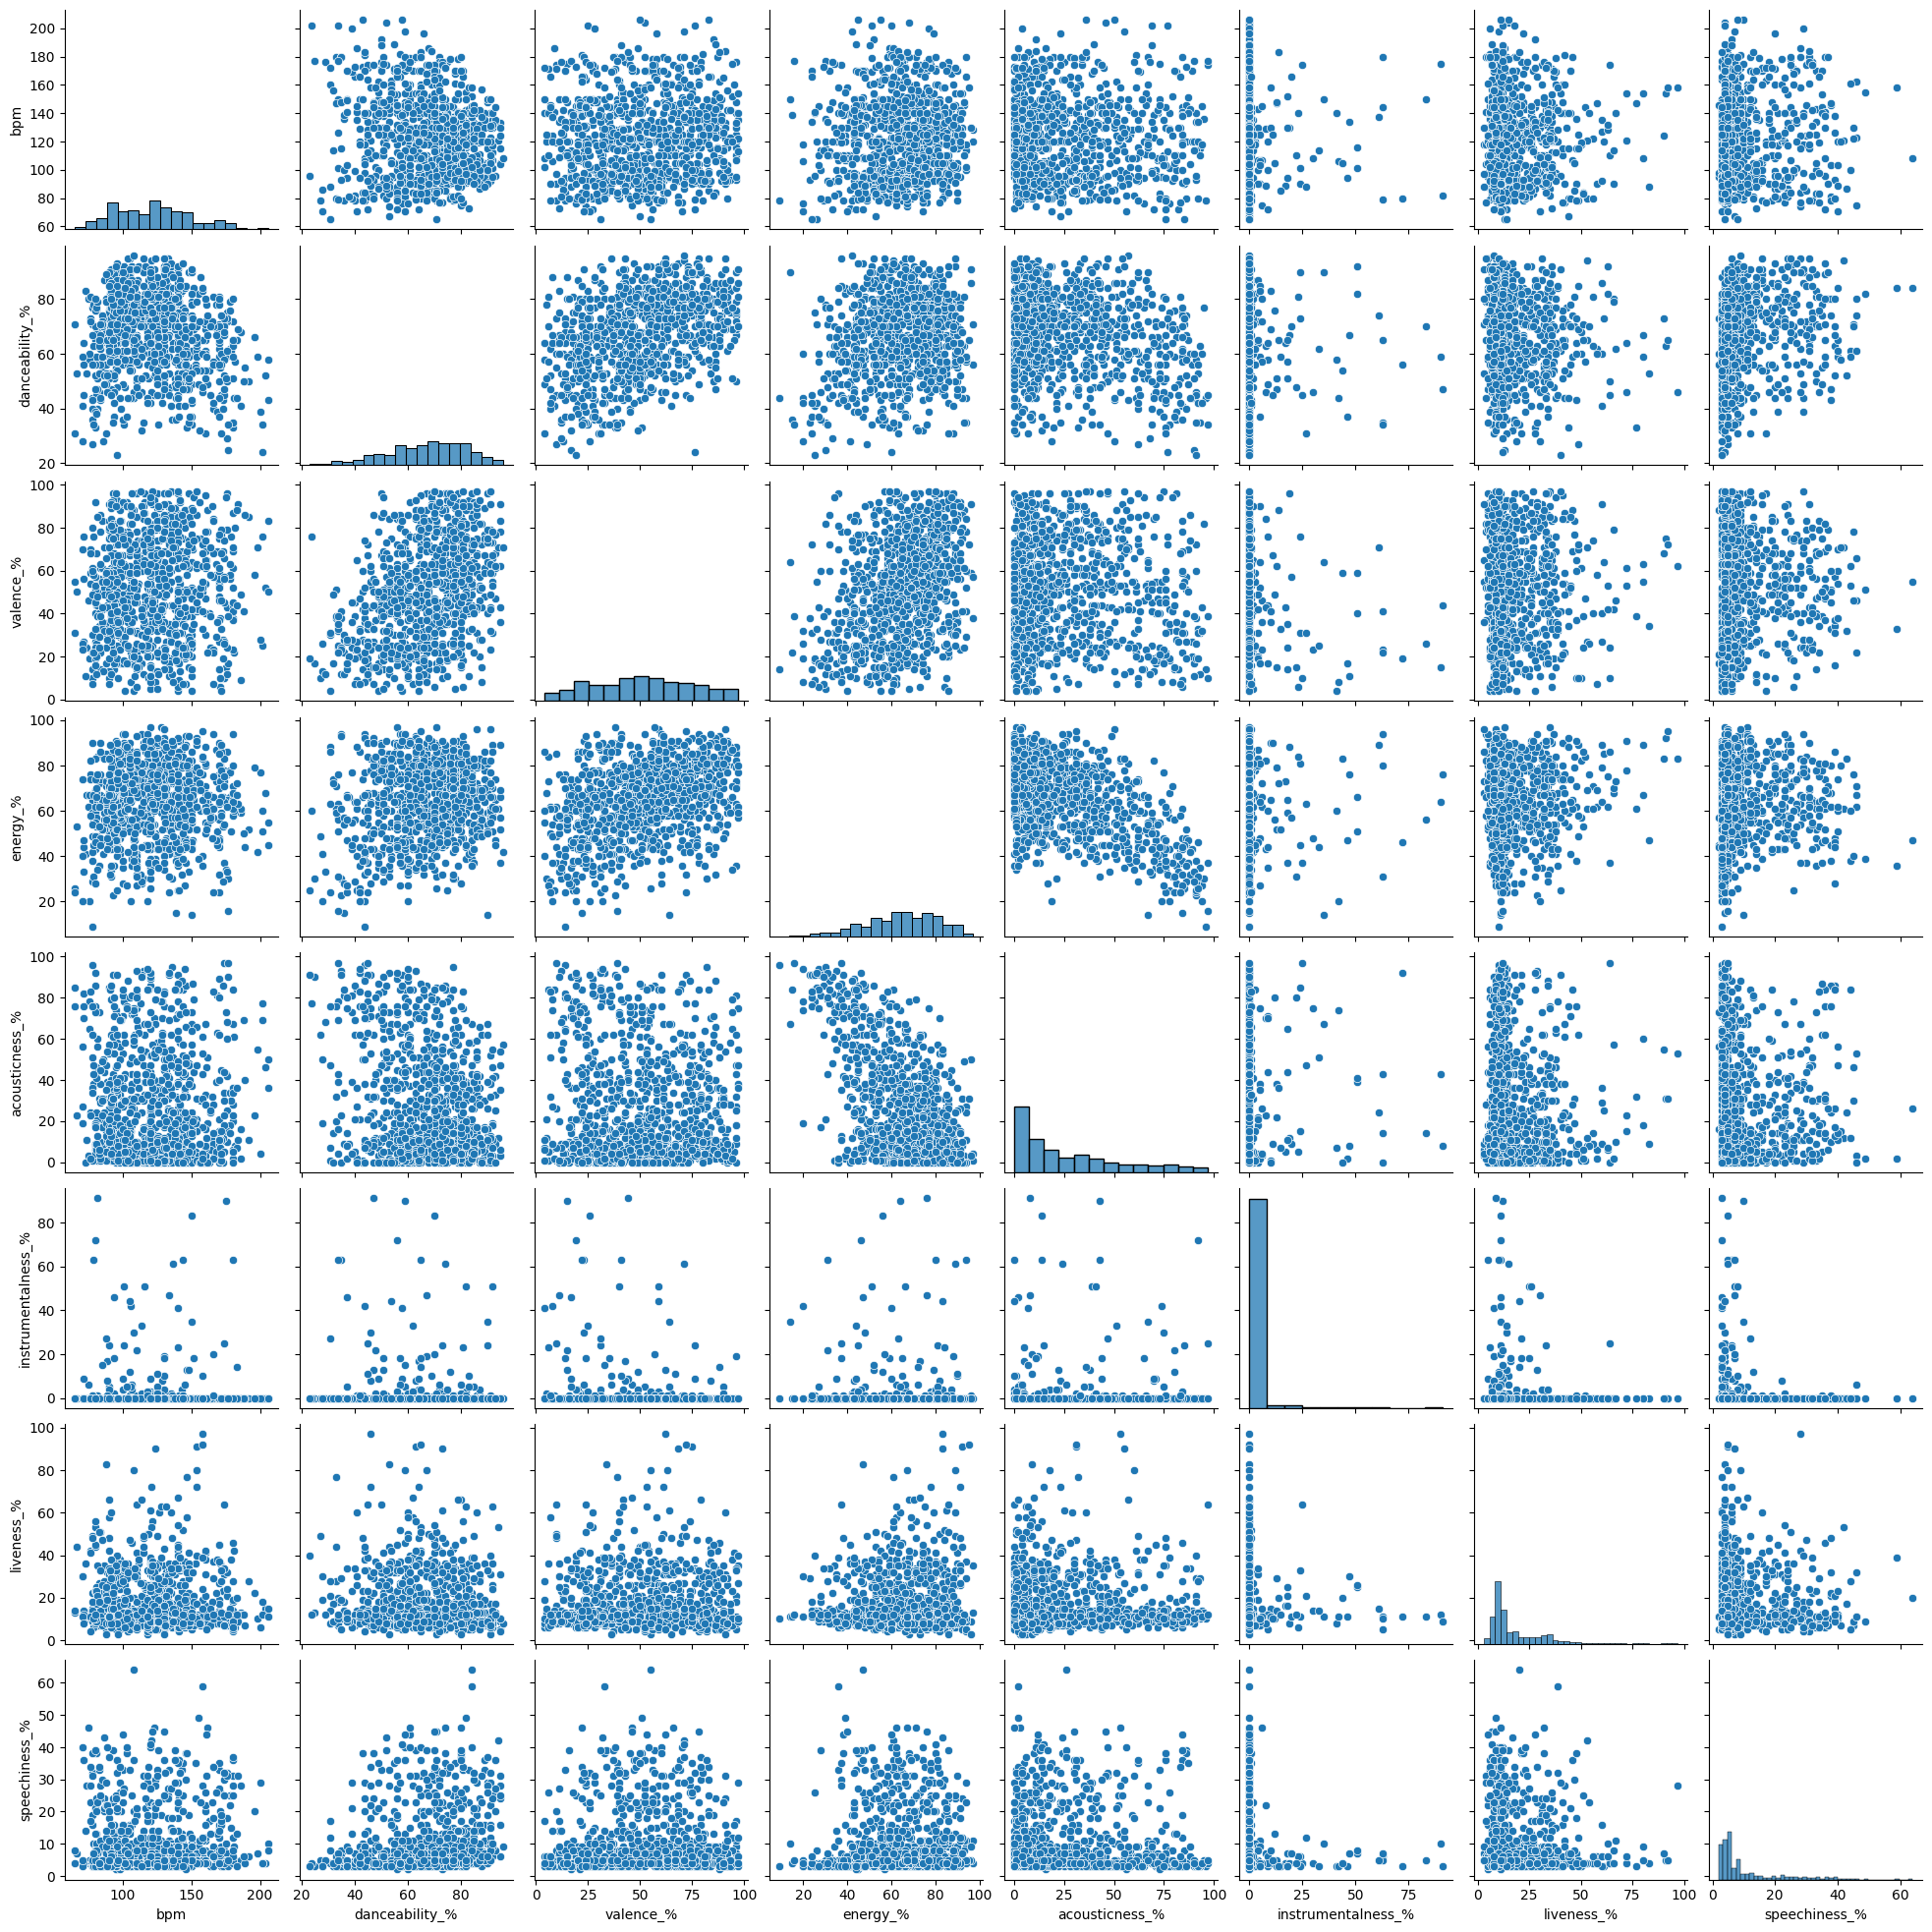

In [101]:
# Crear el pairplot
sns.pairplot(df[audio_features])
plt.show()

In [66]:
# Recuento de canciones por artista
artist_counts = df['artist(s)_name'].value_counts().reset_index()
artist_counts.columns = ['artist', 'song_count']
print(artist_counts.head(15))  # Mostrar los 15 artistas con más canciones


              artist  song_count
0       Taylor Swift          34
1         The Weeknd          22
2          Bad Bunny          19
3                SZA          19
4       Harry Styles          17
5     Kendrick Lamar          12
6      Morgan Wallen          11
7         Ed Sheeran           9
8               Feid           8
9   Drake, 21 Savage           8
10               BTS           8
11    Olivia Rodrigo           7
12          Labrinth           7
13          NewJeans           6
14          Doja Cat           6


In [67]:
# Promedio de reproducciones por artista
artist_streams = df.groupby('artist(s)_name')['Streams_MM'].mean().reset_index()
artist_streams.columns = ['artist', 'average_streams']
artist_streams = artist_streams.sort_values(by='average_streams', ascending=False)
print(artist_streams.head(15))  # Mostrar los 15 artistas con más reproducciones promedio


                           artist  average_streams
592                   Tones and I          2864.79
464         Post Malone, Swae Lee          2808.10
150           Drake, WizKid, Kyla          2713.92
272  Justin Bieber, The Kid Laroi          2665.34
562      The Chainsmokers, Halsey          2591.22
573         The Weeknd, Daft Punk          2565.53
207                 Glass Animals          2557.98
524  Shawn Mendes, Camila Cabello          2484.81
61          Billie Eilish, Khalid          2355.72
561    The Chainsmokers, Coldplay          2204.08
467                         Queen          2197.01
321     Lady Gaga, Bradley Cooper          2159.35
224                        Hozier          2135.16
257                   John Legend          2086.12
610                     Vance Joy          2009.09


C:\Users\sergi\AppData\Local\Temp\ipykernel_22032\1510681398.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='song_count', y='artist', data=artist_counts.head(15), palette='viridis')


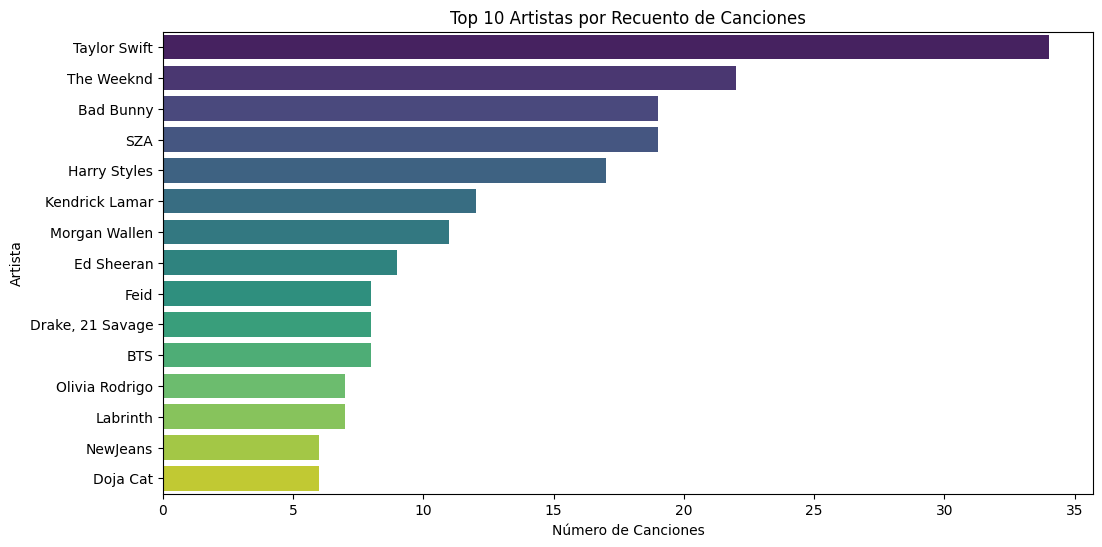

In [68]:
# Gráfico de barras del recuento de canciones por artista
plt.figure(figsize=(12, 6))
sns.barplot(x='song_count', y='artist', data=artist_counts.head(15), palette='viridis')
plt.title('Top 10 Artistas por Recuento de Canciones')
plt.xlabel('Número de Canciones')
plt.ylabel('Artista')
plt.show()

In [71]:
# Promedio de reproducciones en millones por artista
artist_streams = df.groupby('artist(s)_name')['Streams_MM'].mean().reset_index()
artist_streams.columns = ['artist', 'average_streams_MM']
artist_streams = artist_streams.sort_values(by='average_streams_MM', ascending=False)
print(artist_streams.head(10))  # Mostrar los 10 artistas con más reproducciones promedio


                           artist  average_streams_MM
592                   Tones and I             2864.79
464         Post Malone, Swae Lee             2808.10
150           Drake, WizKid, Kyla             2713.92
272  Justin Bieber, The Kid Laroi             2665.34
562      The Chainsmokers, Halsey             2591.22
573         The Weeknd, Daft Punk             2565.53
207                 Glass Animals             2557.98
524  Shawn Mendes, Camila Cabello             2484.81
61          Billie Eilish, Khalid             2355.72
561    The Chainsmokers, Coldplay             2204.08


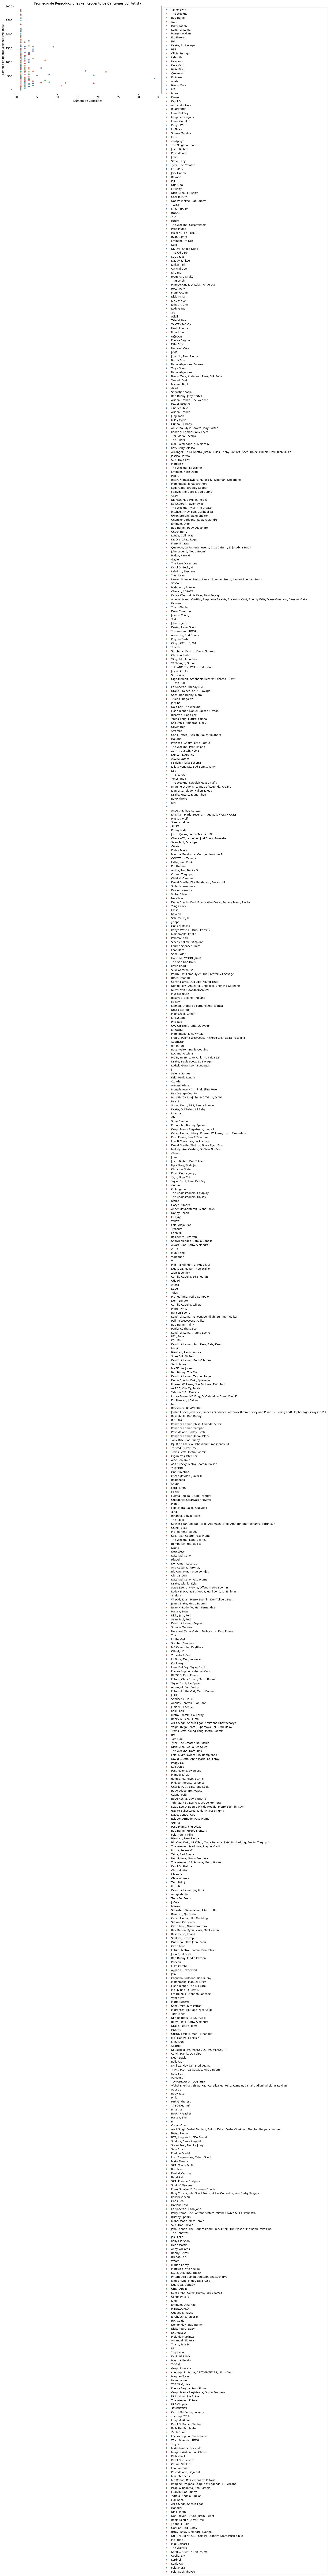

In [72]:
# Unir los dos DataFrames para el gráfico de dispersión
combined_artist_data = artist_counts.merge(artist_streams, on='artist')

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='song_count', y='average_streams_MM', data=combined_artist_data, hue='artist', palette='deep')
plt.title('Promedio de Reproducciones vs. Recuento de Canciones por Artista')
plt.xlabel('Número de Canciones')
plt.ylabel('Promedio de Reproducciones (Millones)')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


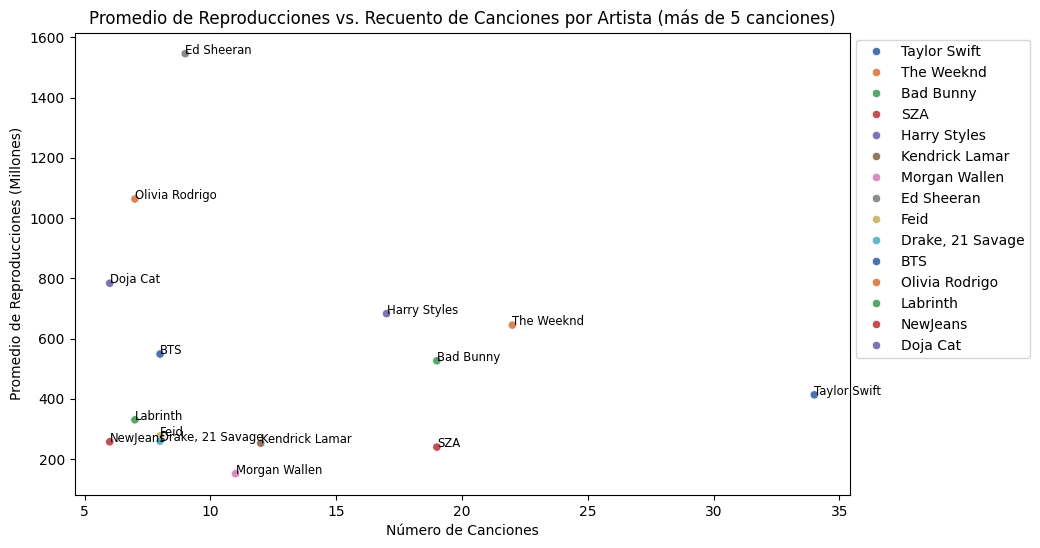

In [73]:
# Filtrar los datos para incluir solo artistas con más de 5 canciones
filtered_artist_data = combined_artist_data[combined_artist_data['song_count'] > 5]

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='song_count', y='average_streams_MM', data=filtered_artist_data, hue='artist', palette='deep')

# Etiquetar cada punto con el nombre del artista
for line in range(0, filtered_artist_data.shape[0]):
    plt.text(filtered_artist_data.song_count.iloc[line],
             filtered_artist_data.average_streams_MM.iloc[line],
             filtered_artist_data.artist.iloc[line], 
             horizontalalignment='left',
             size='small', 
             color='black', 
             weight='light')

plt.title('Promedio de Reproducciones vs. Recuento de Canciones por Artista (más de 5 canciones)')
plt.xlabel('Número de Canciones')
plt.ylabel('Promedio de Reproducciones (Millones)')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()



C:\Users\sergi\AppData\Local\Temp\ipykernel_22032\2628101578.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_streams', y='artist', data=top_artists_total_streams, palette='coolwarm')


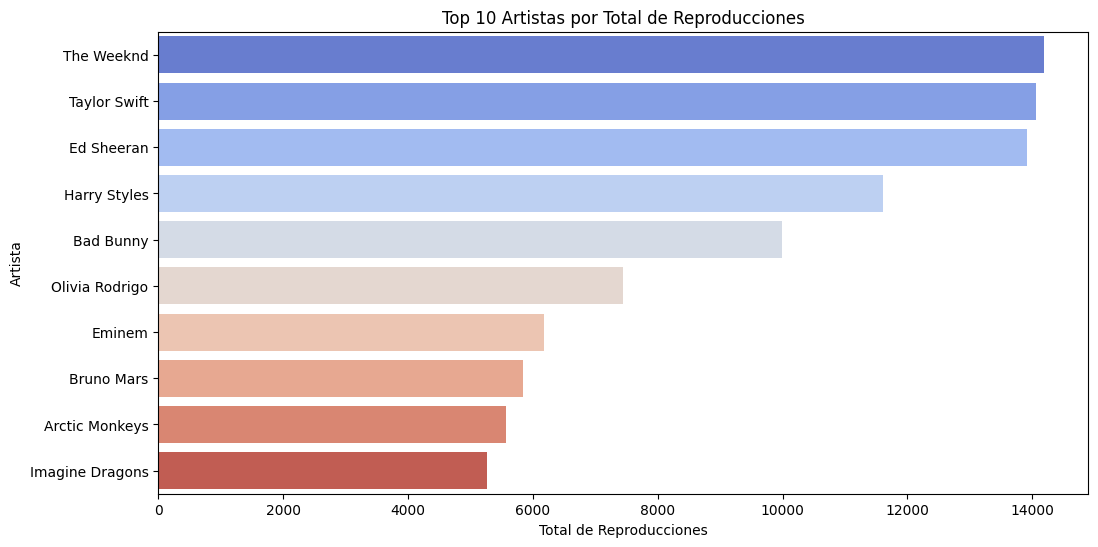

In [74]:
# Calcular el total de streams por artista
artist_total_streams = df.groupby('artist(s)_name')['Streams_MM'].sum().reset_index()
artist_total_streams.columns = ['artist', 'total_streams']

# Ordenar por total de streams en orden descendente y seleccionar los 10 principales
top_artists_total_streams = artist_total_streams.sort_values(by='total_streams', ascending=False).head(10)

# Gráfico de barras de los 10 artistas con más total streams
plt.figure(figsize=(12, 6))
sns.barplot(x='total_streams', y='artist', data=top_artists_total_streams, palette='coolwarm')
plt.title('Top 10 Artistas por Total de Reproducciones')
plt.xlabel('Total de Reproducciones')
plt.ylabel('Artista')
plt.show()


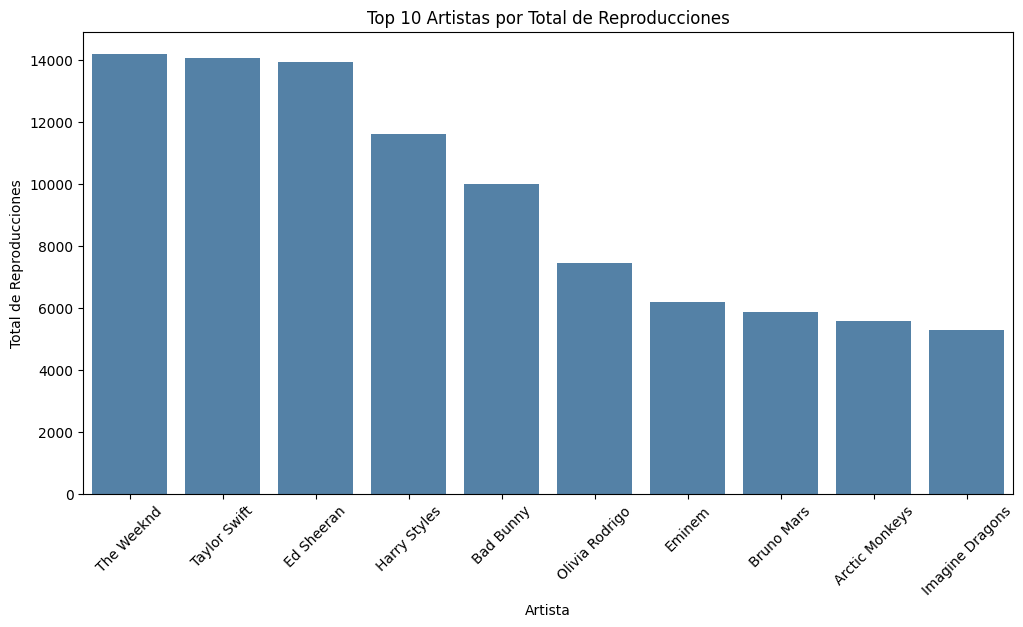

In [74]:
# Gráfico de barras verticales de los 10 artistas con más total streams
plt.figure(figsize=(12, 6))
sns.barplot(x='artist', y='total_streams', data=top_artists_total_streams, color='steelblue')
plt.title('Top 10 Artistas por Total de Reproducciones')
plt.xlabel('Artista')
plt.ylabel('Total de Reproducciones')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()


In [75]:
# Calcular los streams totales acumulados por artista
total_streams_per_artist = df.groupby('artist(s)_name')['Streams_MM'].sum().reset_index()

# Obtener el top 10 artistas con más streams acumulados
top_artists = total_streams_per_artist.nlargest(10, 'Streams_MM')['artist(s)_name'].tolist()




In [76]:
# Calcular el total de reproducciones por año para cada artista utilizando Streams_MM
artist_yearly_streams = df.groupby(['released_year', 'artist(s)_name'])['Streams_MM'].sum().reset_index()

# Filtrar para incluir solo los 10 artistas principales
top_artist_yearly_streams = artist_yearly_streams[artist_yearly_streams['artist(s)_name'].isin(top_artists)]



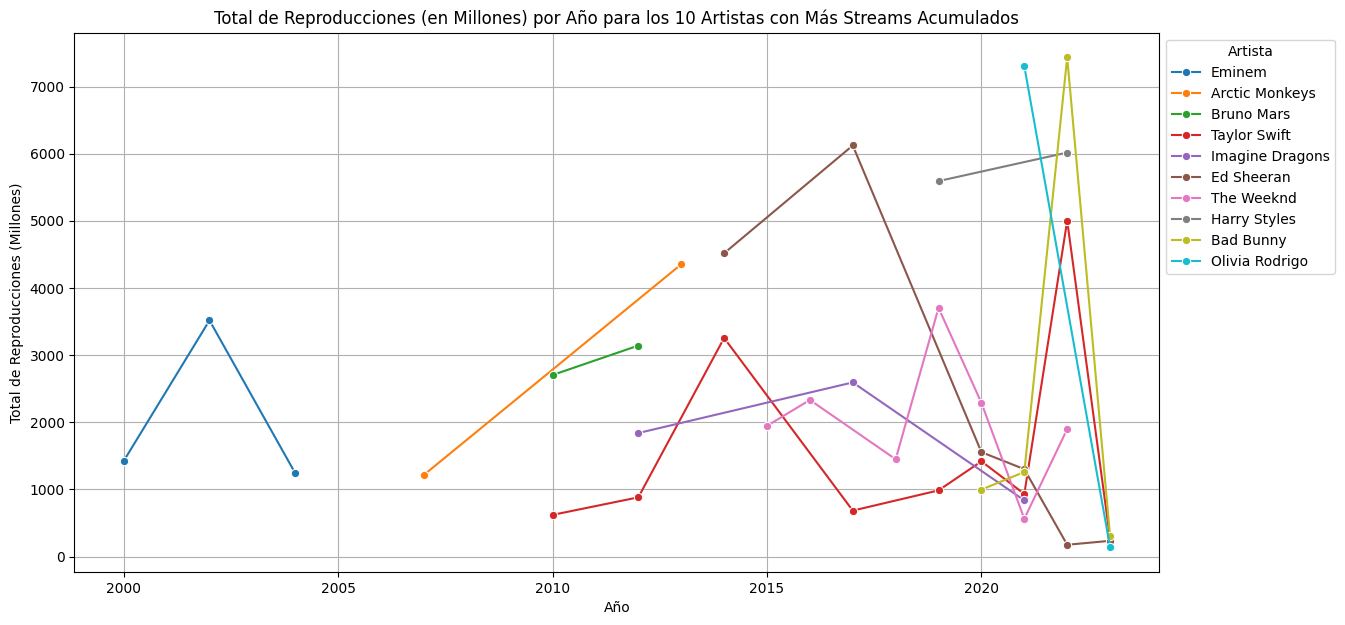

In [77]:
# Gráfico de líneas de total de reproducciones por año para los 10 artistas principales
plt.figure(figsize=(14, 7))
sns.lineplot(data=top_artist_yearly_streams, x='released_year', y='Streams_MM', hue='artist(s)_name', marker='o')
plt.title('Total de Reproducciones (en Millones) por Año para los 10 Artistas con Más Streams Acumulados')
plt.xlabel('Año')
plt.ylabel('Total de Reproducciones (Millones)')
plt.legend(title='Artista', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid()
plt.show()


In [78]:
# Calcular el promedio de cada característica cuantitativa por año
features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
            'instrumentalness_%', 'liveness_%', 'speechiness_%']

average_features_per_year = df.groupby('released_year')[features].mean().reset_index()



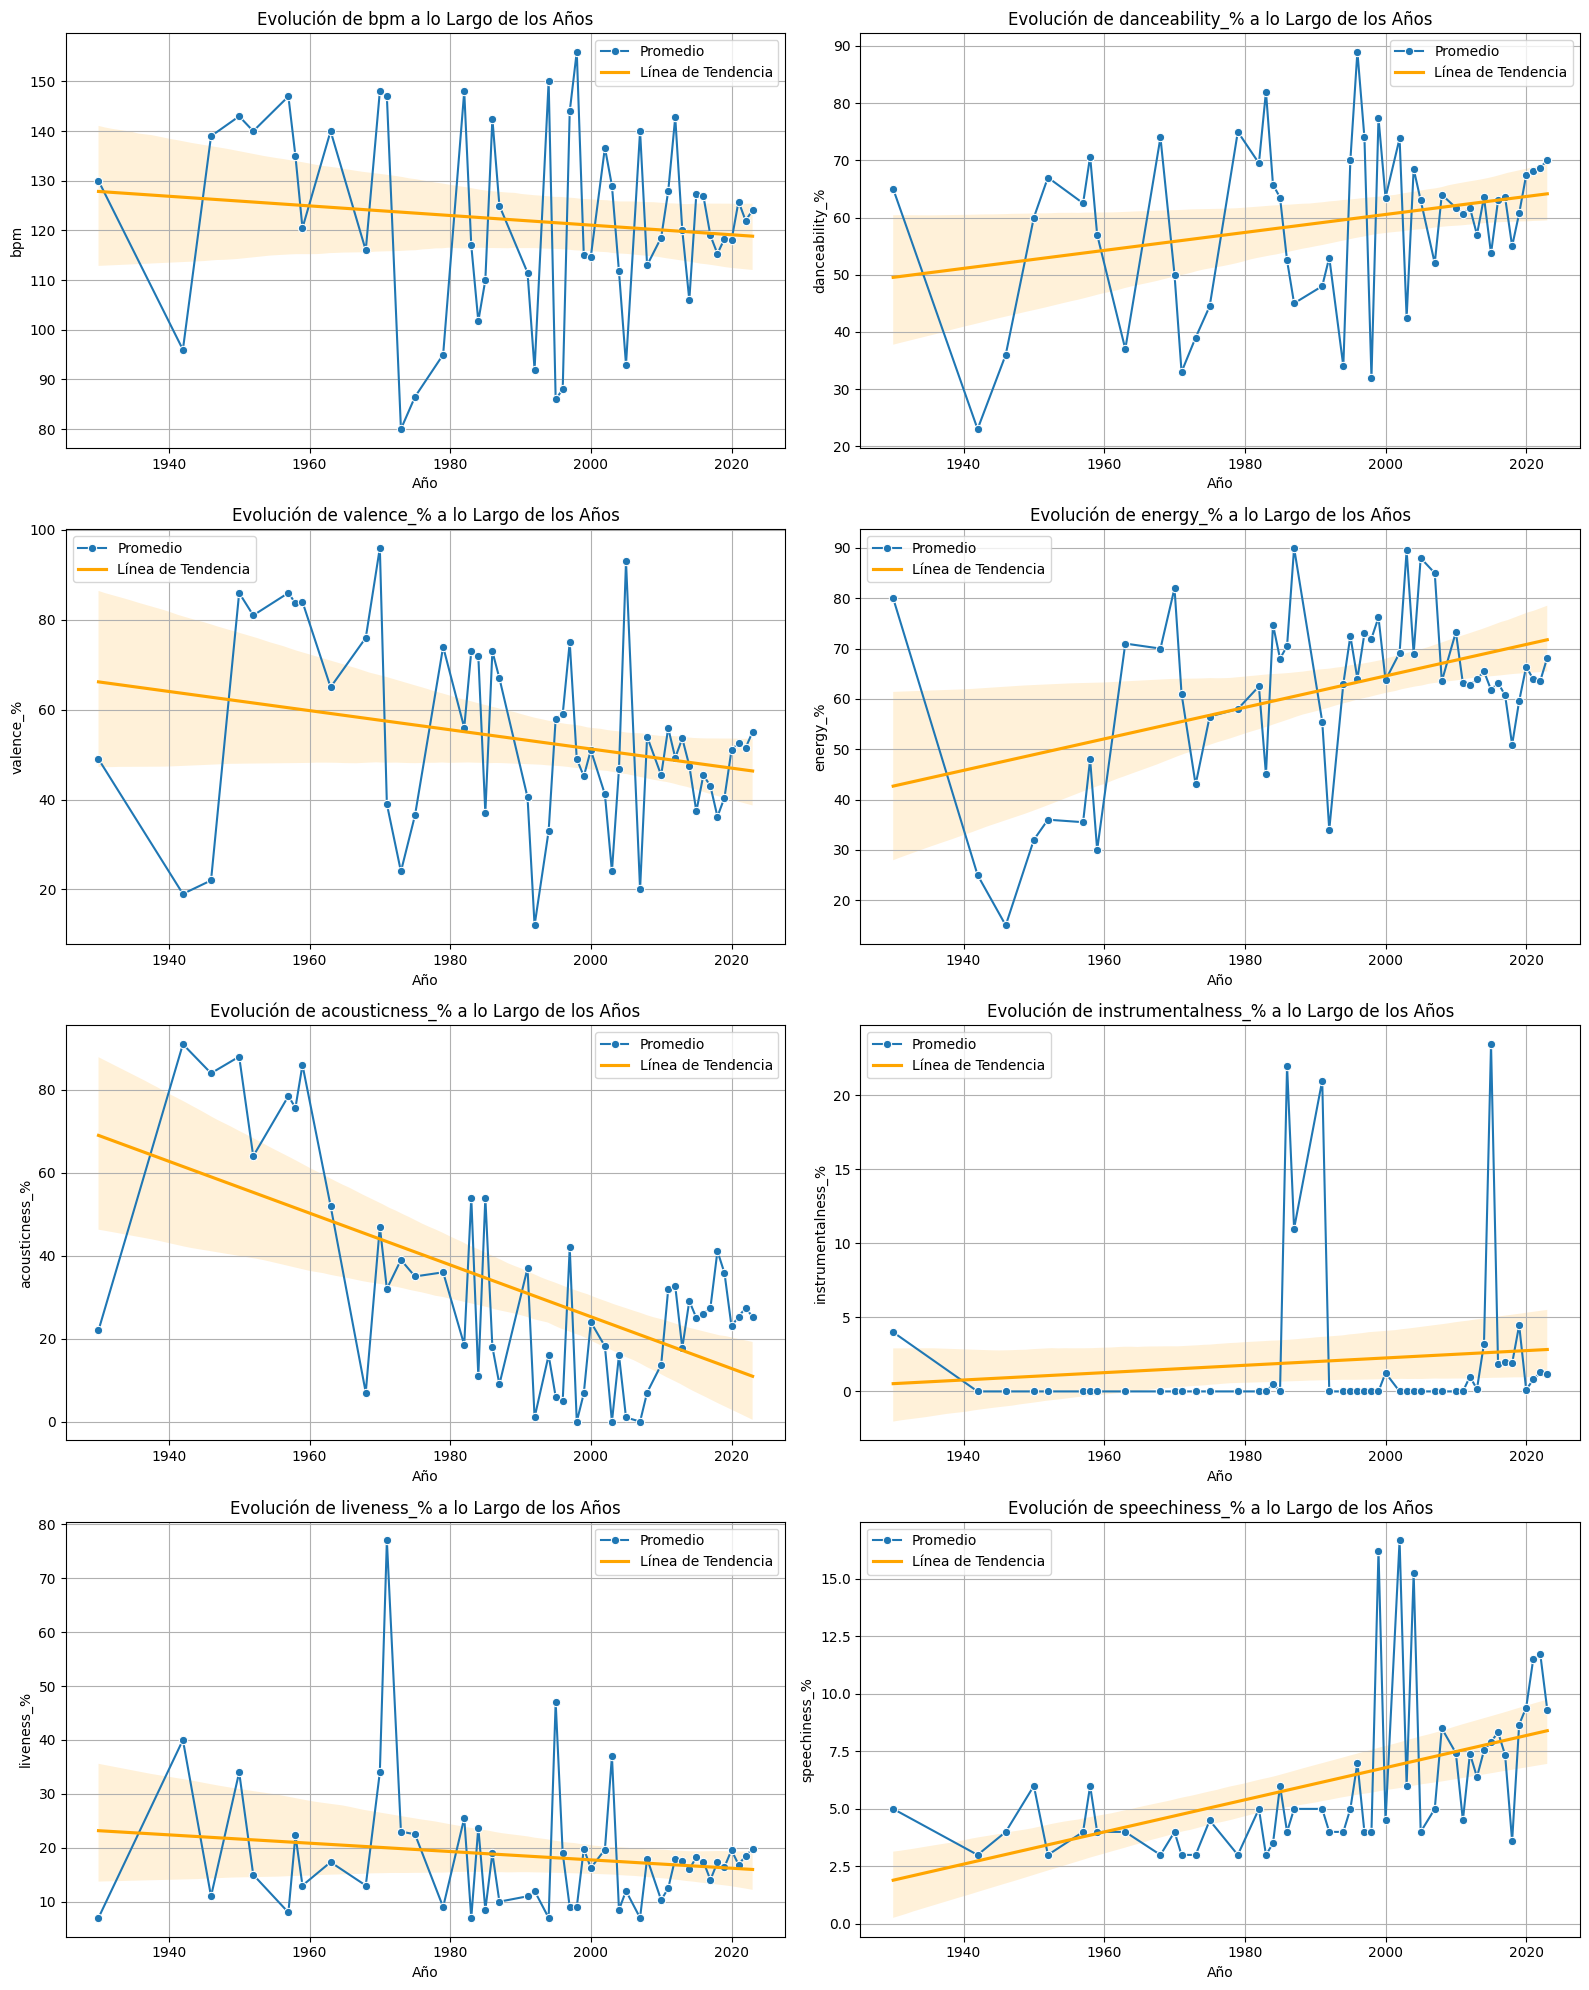

<Figure size 640x480 with 0 Axes>

In [104]:
# Configuración de subgráficos para visualizar la evolución de cada característica
plt.figure(figsize=(16, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.lineplot(data=average_features_per_year, x='released_year', y=feature, marker='o', label='Promedio')
    
    # Agregar línea de tendencia
    sns.regplot(data=average_features_per_year, x='released_year', y=feature, scatter=False, color='orange', label='Línea de Tendencia')
    
    plt.title(f'Evolución de {feature} a lo Largo de los Años')
    plt.xlabel('Año')
    plt.ylabel(feature)
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()

plt.savefig('Evolution.png', dpi=300, bbox_inches='tight')




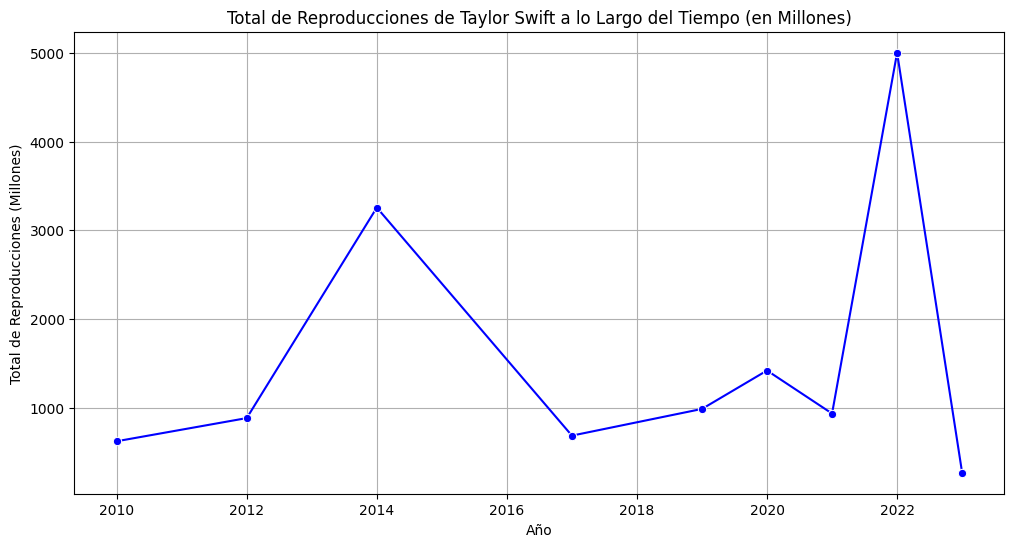

In [80]:
# Filtrar los datos para Taylor Swift
taylor_data = df[df['artist(s)_name'] == 'Taylor Swift']

# Calcular las reproducciones totales por año utilizando Streams_MM
taylor_streams_per_year = taylor_data.groupby('released_year')['Streams_MM'].sum().reset_index()

# Gráfico de líneas para total de reproducciones a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=taylor_streams_per_year, x='released_year', y='Streams_MM', marker='o', color='blue')
plt.title('Total de Reproducciones de Taylor Swift a lo Largo del Tiempo (en Millones)')
plt.xlabel('Año')
plt.ylabel('Total de Reproducciones (Millones)')
plt.grid()
plt.show()



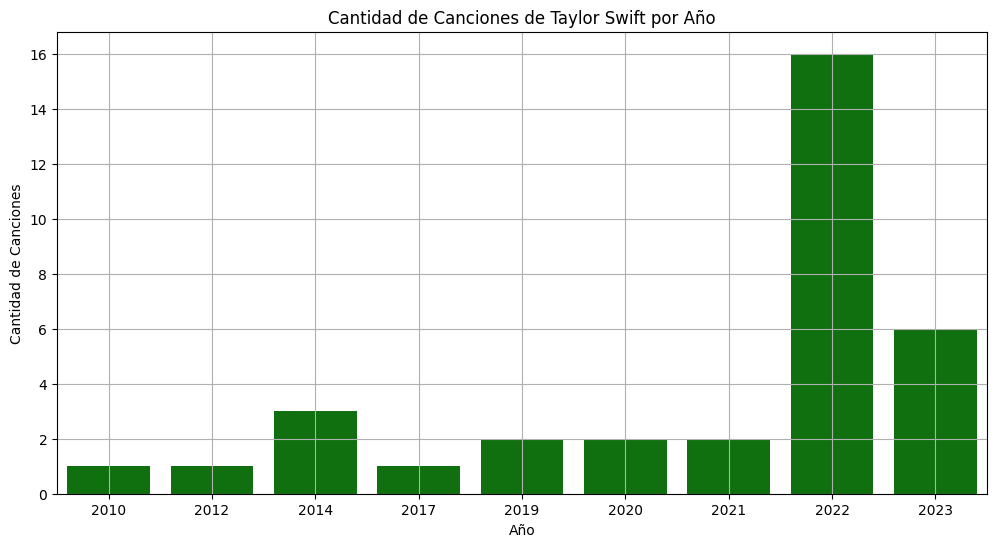

In [81]:
# Contar la cantidad de canciones de Taylor Swift por año
taylor_songs_per_year = taylor_data.groupby('released_year')['track_name'].count().reset_index()

# Gráfico de barras para la cantidad de canciones por año
plt.figure(figsize=(12, 6))
sns.barplot(data=taylor_songs_per_year, x='released_year', y='track_name', color='green')
plt.title('Cantidad de Canciones de Taylor Swift por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Canciones')
plt.grid()
plt.show()


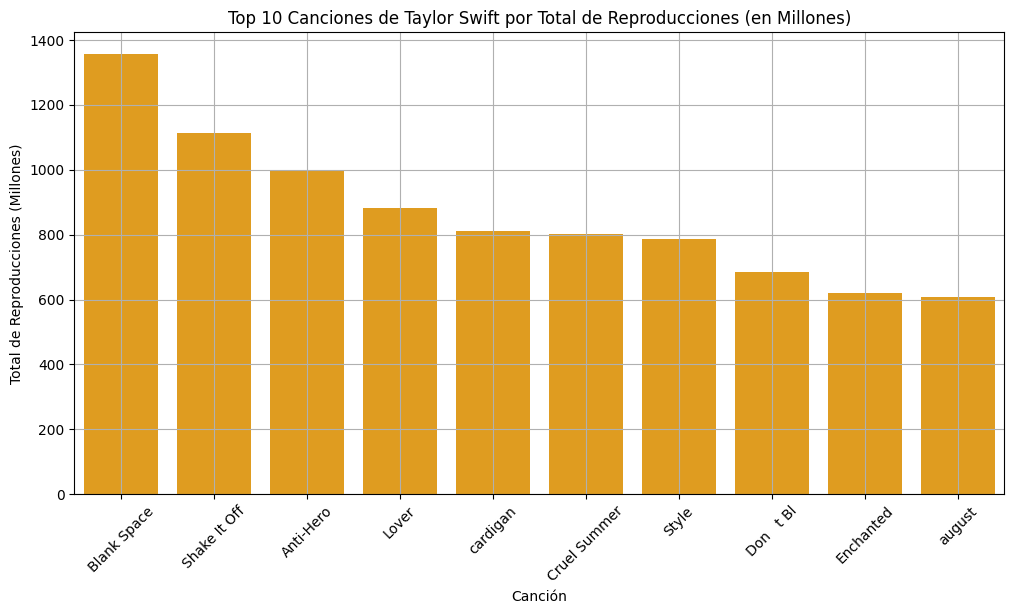

In [82]:
# Calcular el total de reproducciones para cada canción y obtener el top 10 utilizando Streams_MM
top_10_songs = taylor_data.groupby('track_name')['Streams_MM'].sum().nlargest(10).reset_index()

# Gráfico de barras para el top 10 canciones
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_songs, x='track_name', y='Streams_MM', color='orange')
plt.title('Top 10 Canciones de Taylor Swift por Total de Reproducciones (en Millones)')
plt.xlabel('Canción')
plt.ylabel('Total de Reproducciones (Millones)')
plt.xticks(rotation=45)
plt.grid()
plt.show()




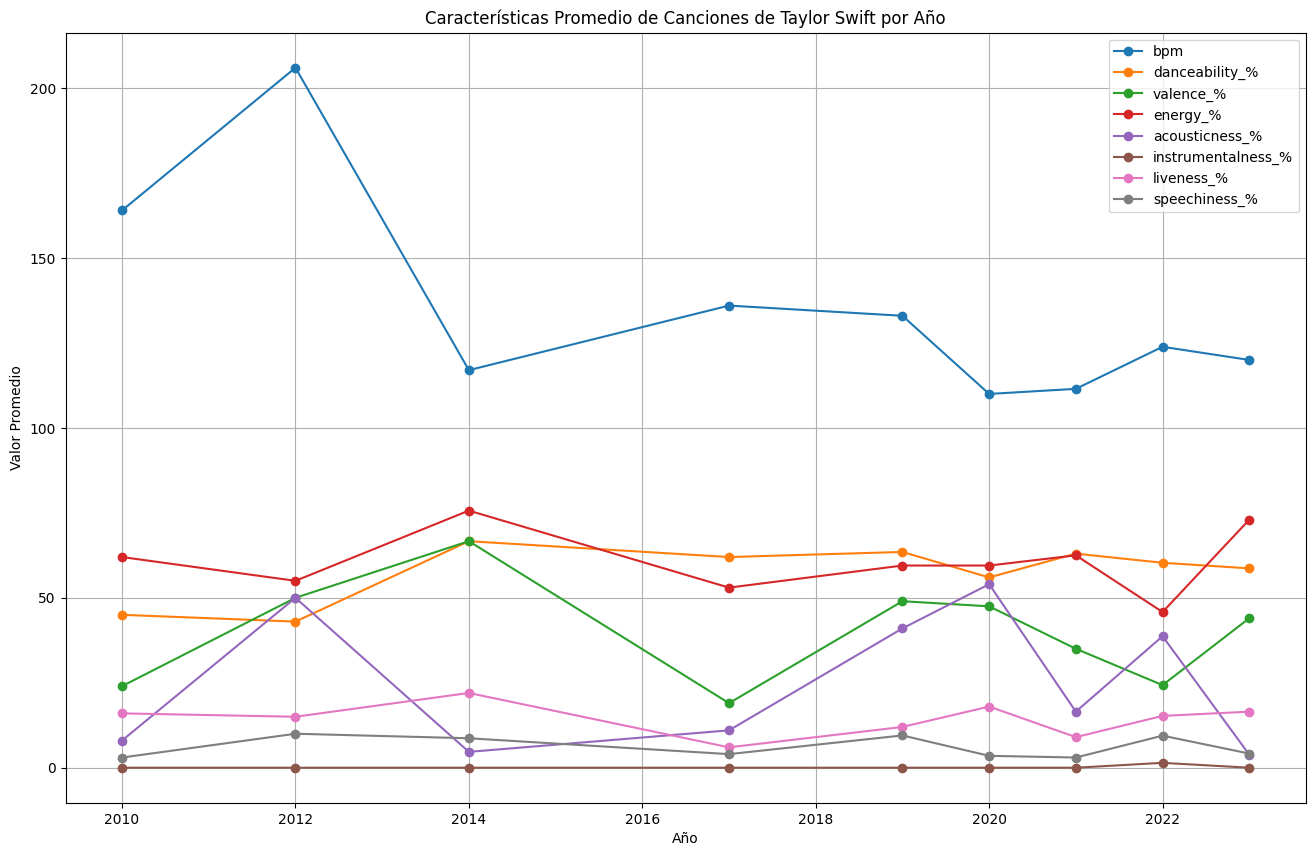

In [104]:
# Calcular las características promedio por año
average_features_per_year = taylor_data.groupby('released_year')[features].mean().reset_index()

# Graficar características promedio por año
plt.figure(figsize=(16, 10))
for feature in features:
    plt.plot(average_features_per_year['released_year'], average_features_per_year[feature], marker='o', label=feature)

plt.title('Características Promedio de Canciones de Taylor Swift por Año')
plt.xlabel('Año')
plt.ylabel('Valor Promedio')
plt.legend()
plt.grid()
plt.show()


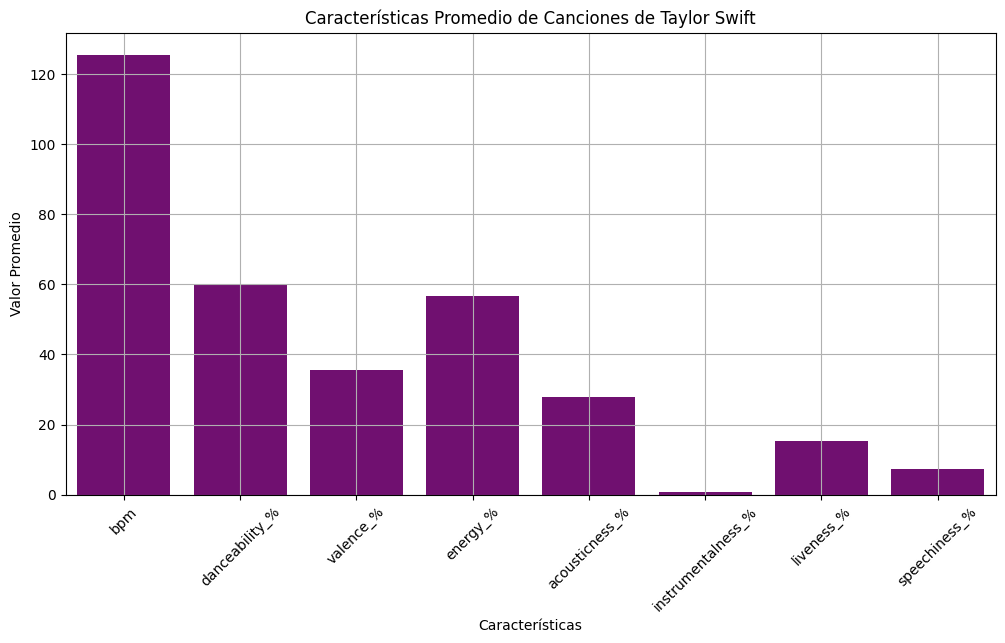

In [83]:
# Calcular características promedio de las canciones de Taylor Swift
average_features = taylor_data[features].mean().reset_index()
average_features.columns = ['Feature', 'Average_Value']

# Gráfico de barras para características promedio
plt.figure(figsize=(12, 6))
sns.barplot(data=average_features, x='Feature', y='Average_Value', color='purple')
plt.title('Características Promedio de Canciones de Taylor Swift')
plt.xlabel('Características')
plt.ylabel('Valor Promedio')
plt.xticks(rotation=45)
plt.grid()
plt.show()


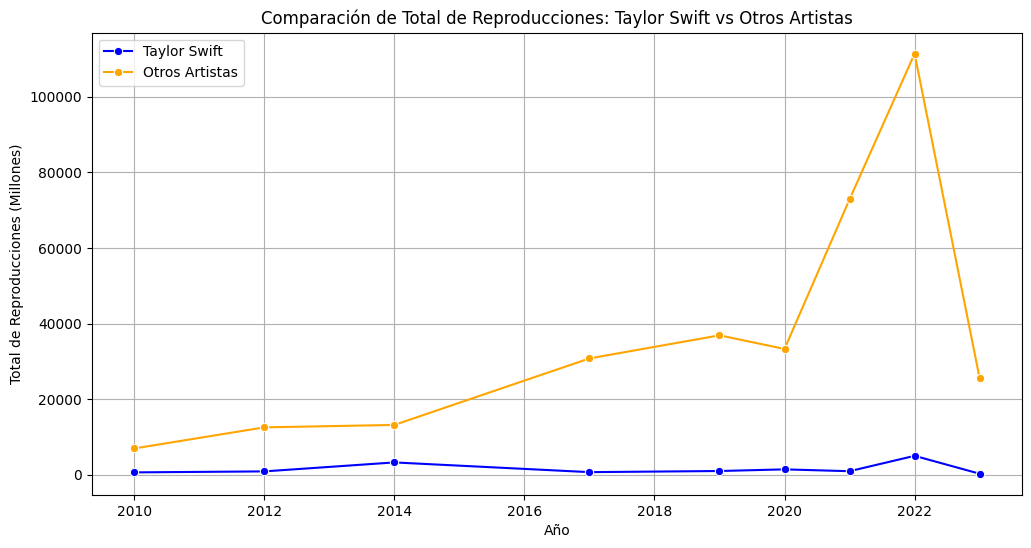

In [84]:
# Calcular total de reproducciones de otros artistas
other_artists_streams = df[df['artist(s)_name'] != 'Taylor Swift'].groupby('released_year')['Streams_MM'].sum().reset_index()
taylor_streams = taylor_data.groupby('released_year')['Streams_MM'].sum().reset_index()

# Unir los datos de Taylor Swift y otros artistas
comparison_streams = pd.merge(taylor_streams, other_artists_streams, on='released_year', suffixes=('_taylor', '_other'))

# Gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=comparison_streams, x='released_year', y='Streams_MM_taylor', marker='o', label='Taylor Swift', color='blue')
sns.lineplot(data=comparison_streams, x='released_year', y='Streams_MM_other', marker='o', label='Otros Artistas', color='orange')
plt.title('Comparación de Total de Reproducciones: Taylor Swift vs Otros Artistas')
plt.xlabel('Año')
plt.ylabel('Total de Reproducciones (Millones)')
plt.legend()
plt.grid()
plt.show()


<Figure size 1200x600 with 0 Axes>

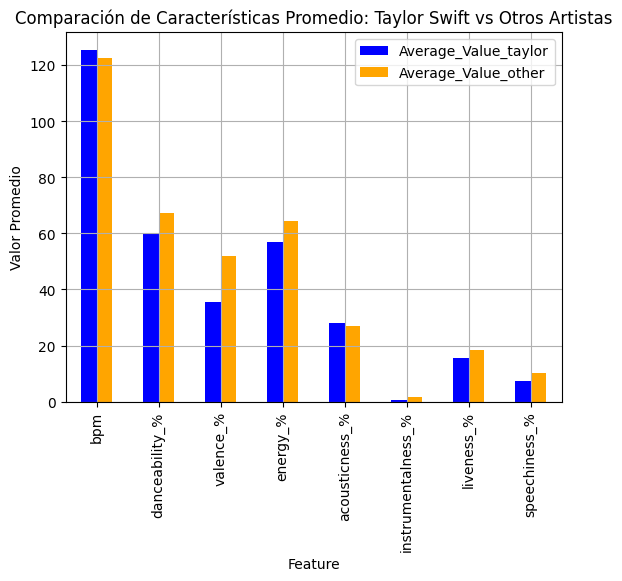

In [105]:
# Calcular características promedio para otros artistas
other_artists_avg_features = df[df['artist(s)_name'] != 'Taylor Swift'][features].mean().reset_index()
other_artists_avg_features.columns = ['Feature', 'Average_Value']

# Calcular características promedio de Taylor Swift
taylor_avg_features = taylor_data[features].mean().reset_index()
taylor_avg_features.columns = ['Feature', 'Average_Value']

# Unir ambos DataFrames
comparison_avg_features = pd.merge(taylor_avg_features, other_artists_avg_features, on='Feature', suffixes=('_taylor', '_other'))

# Gráfico de barras
plt.figure(figsize=(12, 6))
comparison_avg_features.set_index('Feature')[['Average_Value_taylor', 'Average_Value_other']].plot(kind='bar', color=['blue', 'orange'])
plt.title('Comparación de Características Promedio: Taylor Swift vs Otros Artistas')
plt.ylabel('Valor Promedio')
plt.xticks(rotation=90)
plt.grid()
plt.show()


In [90]:
# Selecciona solo las columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])
# Correlacion entre Caracteristicas Musicales y numero de Streams
correlation_with_streams = numeric_df.corr()['Streams_MM'].sort_values(ascending=False)
print(correlation_with_streams)


Streams_MM              1.000000
streams                 1.000000
in_spotify_playlists    0.789822
in_apple_playlists      0.772063
in_apple_charts         0.320234
in_spotify_charts       0.245821
in_deezer_charts        0.228598
released_day            0.010598
bpm                    -0.002438
acousticness_%         -0.004485
released_month         -0.024938
energy_%               -0.026052
valence_%              -0.040832
instrumentalness_%     -0.044902
liveness_%             -0.048337
danceability_%         -0.105457
speechiness_%          -0.112333
artist_count           -0.136463
released_year          -0.230803
Name: Streams_MM, dtype: float64


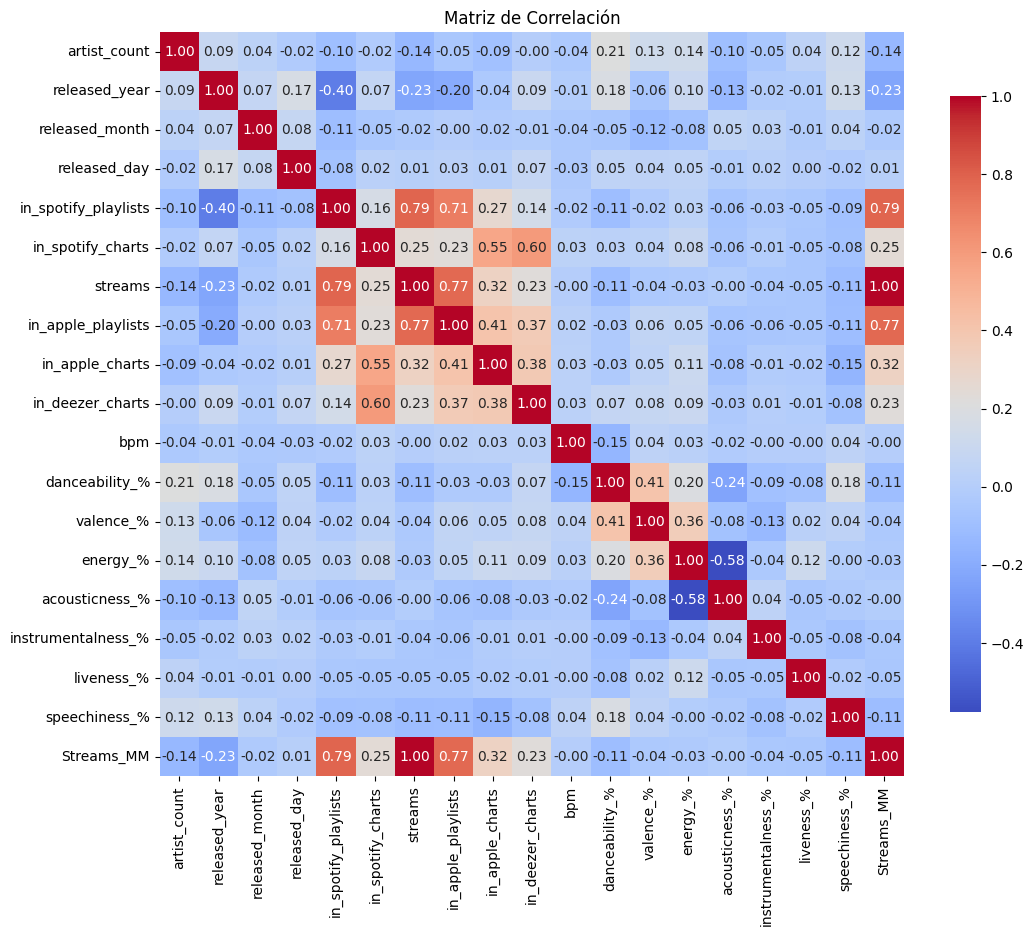

In [94]:
# Selecciona solo las columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Calcula la matriz de correlación
correlation_matrix = numeric_df.corr()

# Configura el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crea un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Configura los títulos y etiquetas
plt.title('Matriz de Correlación')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


